In [7]:
!pip install crepe
!pip install librosa
!pip install tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 760.0 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 9.8 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 7.0 MB/s eta 0:00:0000:01m0:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 9.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.2 MB/s eta 0:00:00ta 0:00:0

In [8]:
import crepe
import librosa
from scipy.io import wavfile

name = "demucs_separated/mdx_extra/ПОШЛАЯ МОЛЛИ - Контракт/vocals.mp3"
audio, sr = librosa.load(name)
# sr, audio = wavfile.read(name)
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True)

/Users/dsprotasov/MusicNIR/venv/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


641/641 [==============================] - 179s 279ms/step


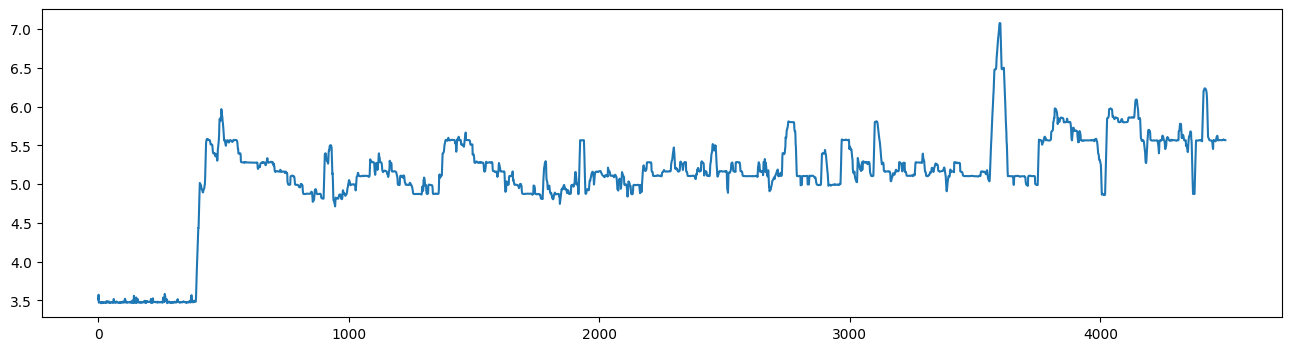

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[16, 4])
plt.plot(np.log(frequency)[500:5000])
plt.show()

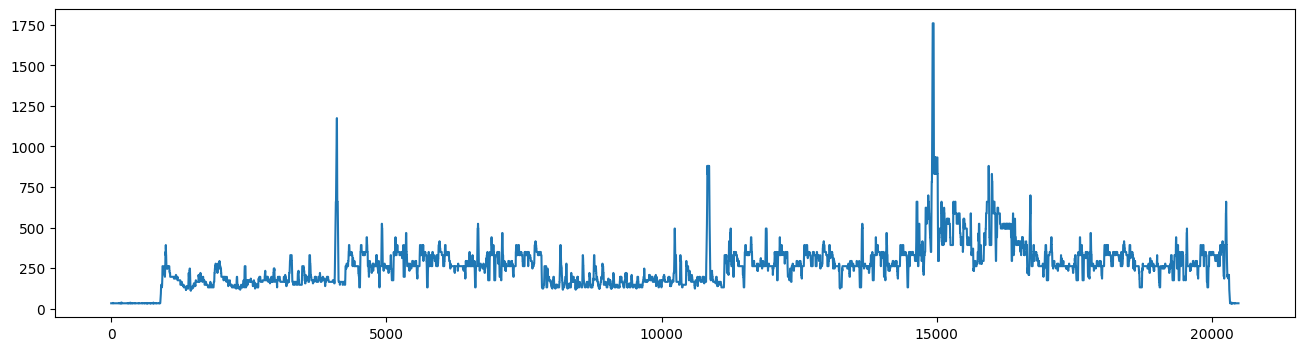

In [11]:
from IPython.display import display, Audio

notes = librosa.hz_to_note(frequency)
note_audio = librosa.note_to_hz(notes)
plt.figure(figsize=[16, 4])
plt.plot(note_audio)
display(Audio(note_audio, rate=sr))